# Unsupervised Learning: Clustering

In classification (supervised), we try to find boundaries/rules to separate points according to pre-determined labels.

In clustering, the algorithm chooses the labels.  Goal is to choose labels so that similar rows get labeled the same.

Today: K-Means Clustering

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets

In [20]:
x, y = datasets.make_blobs(n_samples=100, centers=3, cluster_std=1.2, random_state=3)
df = pd.DataFrame(x, columns=["x0", "x1"])
df.head()

,x0,x1
0,8.370099,7.747045
1,-2.701740,0.395336
2,-3.204128,-0.407438
3,-3.132762,-1.335692
4,7.152737,6.069995


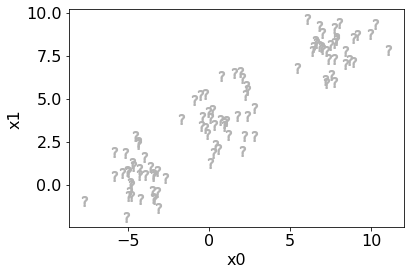

In [21]:
# x0 => x-axis
# x1 => y-axis
# cluster => marker type
def km_scatter(df, **kwargs):
    ax = kwargs.pop("ax", None)
    if not "label" in df.columns:
        return df.plot.scatter(x="x0", y="x1", marker="$?$", ax=ax, **kwargs)

    for marker in set(df["label"]):
        sub_df = df[df["label"] == marker]
        ax = sub_df.plot.scatter(x="x0", y="x1", marker=marker, ax=ax, **kwargs)
    return ax

ax = km_scatter(df, s=100, c="0.7")

# Hard Problem

Finding the best answer.

# Easier Problem

Taking a bad answer and make it a little better.  Then repeat!

<AxesSubplot:xlabel='x0', ylabel='x1'>

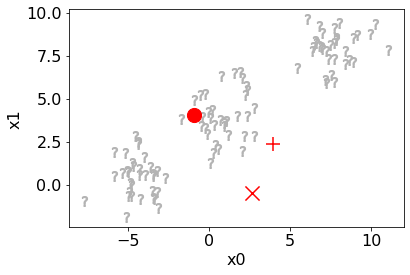

In [34]:
clusters = np.random.uniform(-5, 5, size=(3,2))
clusters = pd.DataFrame(clusters, columns=["x0", "x1"])
clusters["label"] = ["o", "+", "x"]

ax = km_scatter(df, s=100, c="0.7")
km_scatter(clusters, s=200, c="red", ax=ax)

In [35]:
clusters

,x0,x1,label
0,-0.906666,4.028142,o
1,3.975939,2.352433,+
2,2.638015,-0.480219,x


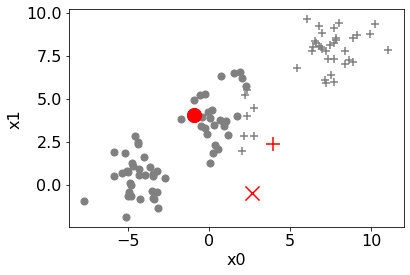

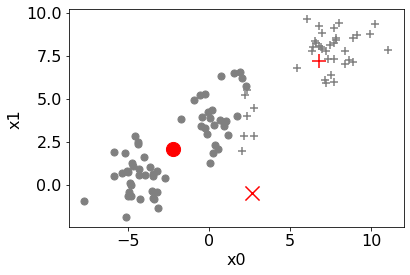

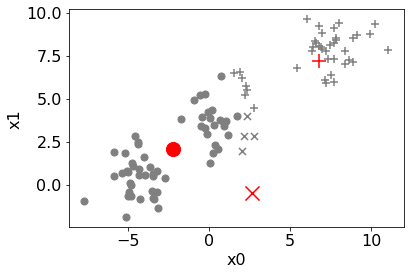

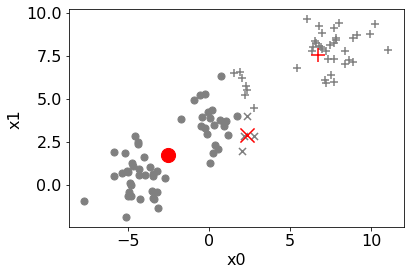

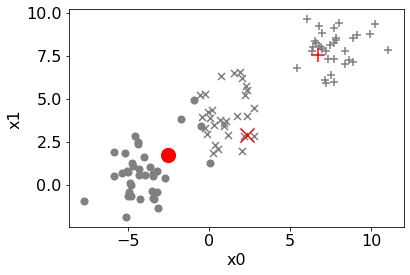

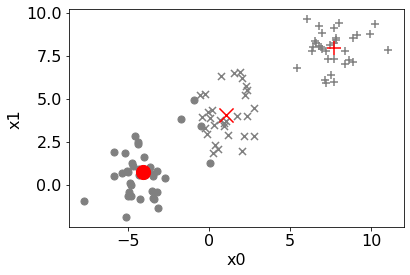

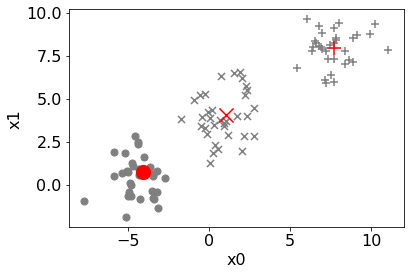

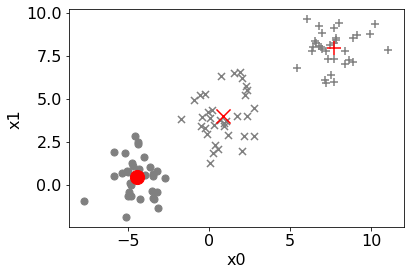

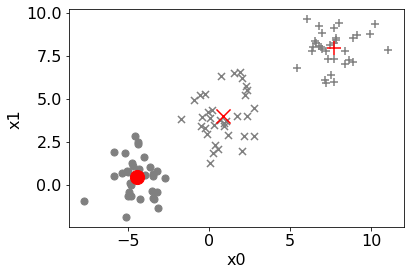

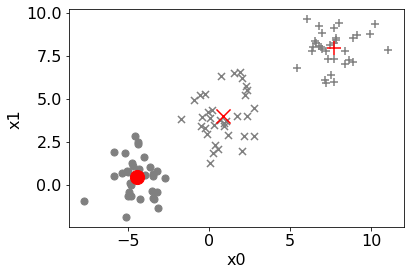

In [36]:
class KM:
    def __init__(self, df, clusters):
        self.df = df.copy()
        self.clusters = clusters.copy()
        self.labels = np.array(clusters["label"])
        
    def plot(self):
        ax = km_scatter(self.df, color="gray", s=50)
        km_scatter(self.clusters, color="red", ax=ax, s=200)
        
    # centroids(clusters) => points(df)
    def assign_points(self):
        for cluster in self.clusters.itertuples():         
            x0_diff = self.df["x0"] - cluster.x0
            x1_diff = self.df["x1"] - cluster.x1
            dist = (x0_diff ** 2 + x1_diff ** 2) ** 0.5
            self.df[cluster.label] = dist
            
        self.df["label"] = km.labels[km.df[km.labels].values.argmin(axis=1)]
    
    # points(df) => centroids(clusters)
    def update_centers(self):
        for cluster in self.clusters.itertuples():
            cluster_points_df = self.df[self.df["label"] == cluster.label]
            if len(cluster_points_df) == 0:
                continue
            avg_x0 = cluster_points_df["x0"].mean()
            avg_x1 = cluster_points_df["x1"].mean()
            self.clusters.at[cluster.Index, "x0"] = avg_x0
            self.clusters.at[cluster.Index, "x1"] = avg_x1

km = KM(df, clusters)

# epoch is the common name for "i" in iterative algorithms
for epoch in range(5):
    km.assign_points()
    km.plot()
    km.update_centers()
    km.plot()
    # if it's not getter better, break out

In [25]:
clusters

,x0,x1,label
0,2.632766,-3.362360,o
1,3.637443,0.416695,+
2,-0.022471,-3.078580,x


# KMeans in sklearn

In [26]:
# 1. fit (find centers)
km2 = KMeans(3)
km2.fit(df[["x0", "x1"]])
km2.cluster_centers_

array([[-4.41347291,  0.43410278],
       [ 7.69751168,  7.9241129 ],
       [ 0.85985598,  3.98556415]])

In [27]:
km.clusters

,x0,x1,label
0,2.632766,-3.362360,o
1,6.398567,7.319892,+
2,-2.412807,1.694297,x


In [28]:
# 2. transform (get distances to centers)
km2.transform(df[["x0", "x1"]])[:10, :]

array([[14.72748598,  0.69550479,  8.39955315],
       [ 1.71217188, 12.83849367,  5.057144  ],
       [ 1.47333179, 13.72080475,  5.984516  ],
       [ 2.18458064, 14.24916908,  6.65257594],
       [12.86625407,  1.93249405,  6.62911793],
       [ 1.56004975, 14.14472291,  6.42867089],
       [ 1.29983259, 14.79157898,  7.00663718],
       [13.35025948,  1.56332001,  7.09747529],
       [ 1.20010768, 13.93648735,  6.1620119 ],
       [ 5.12923462,  9.23940355,  1.75079801]])

In [29]:
km.df[["o", "+", "x"]].head()

,o,+,x
0,12.503434,2.249682,12.535351
1,6.525123,11.173674,1.243445
2,6.542239,12.063695,2.135040
3,6.111358,12.612685,3.020154
4,10.459419,1.435676,10.690034


In [30]:
km2.fit_transform(df[["x0", "x1"]]) [:10, :]
# shortcut:
# km2.fit(df[["x0", "x1"]])
# km2.transform(df[["x0", "x1"]])

array([[ 8.39955315,  0.69550479, 14.72748598],
       [ 5.057144  , 12.83849367,  1.71217188],
       [ 5.984516  , 13.72080475,  1.47333179],
       [ 6.65257594, 14.24916908,  2.18458064],
       [ 6.62911793,  1.93249405, 12.86625407],
       [ 6.42867089, 14.14472291,  1.56004975],
       [ 7.00663718, 14.79157898,  1.29983259],
       [ 7.09747529,  1.56332001, 13.35025948],
       [ 6.1620119 , 13.93648735,  1.20010768],
       [ 1.75079801,  9.23940355,  5.12923462]])

In [31]:
# 3. predict (given the cluster labels, 0, 1, 2, ...)
km2.predict(df[["x0", "x1"]])

array([1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       1, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1], dtype=int32)

In [32]:
km.df["label"]

0     +
1     x
2     x
3     x
4     +
     ..
95    x
96    x
97    x
98    +
99    +
Name: label, Length: 100, dtype: object

# How many clusters?

In [41]:
# elbow plot depends "intertia"
km = KMeans(3)
km.fit(df)
km.inertia_ # average squared distance of a point to it's centroid

260.7196850565892

In [49]:
# x axis is clusters, y axis is inertia

line_series = pd.Series(dtype=float)

for cluster_count in range(1, 10):
    km = KMeans(cluster_count)
    km.fit(df)
    line_series.at[cluster_count] = km.inertia_
    
line_series

1    3621.095890
2     927.007644
3     260.719685
4     212.396748
5     184.925364
6     155.213579
7     129.998108
8     110.008005
9      97.412487
dtype: float64

Text(0, 0.5, 'Inertia (avg sq dist to cent)')

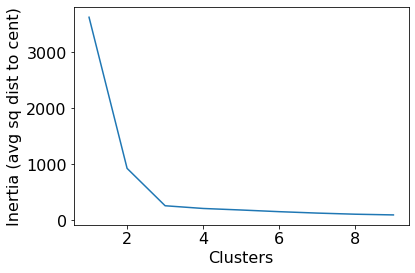

In [51]:
ax = line_series.plot.line()
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia (avg sq dist to cent)")

Text(0, 0.5, 'Inertia (avg sq dist to cent)')

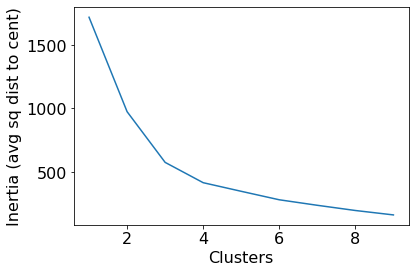

In [57]:
# no elbow, random data

df_rand = pd.DataFrame(np.random.uniform(0, 10, size=(100,2)))

line_series = pd.Series(dtype=float)

for cluster_count in range(1, 10):
    km = KMeans(cluster_count)
    km.fit(df_rand)
    line_series.at[cluster_count] = km.inertia_
    
ax = line_series.plot.line()
ax.set_xlabel("Clusters")
ax.set_ylabel("Inertia (avg sq dist to cent)")

# KMeans as Preprocessing

Sometimes we'll use an unsupervised learning technique (like k-means) to pre-process data, creating better inputs for a supervised learning technique (like logistic regression)

In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [59]:
def make_data():
    x, y = datasets.make_blobs(n_samples=250, centers=5, random_state=5)
    xcols = ["x0", "x1"]
    df1 = pd.DataFrame(x, columns=xcols)
    df1["y"] = y > 0

    df2 = pd.DataFrame(np.random.uniform(-10, 10, size=(250, 2)), columns=["x0", "x1"])
    df2["y"] = False

    return pd.concat((df1, df2))

train, test = train_test_split(make_data())

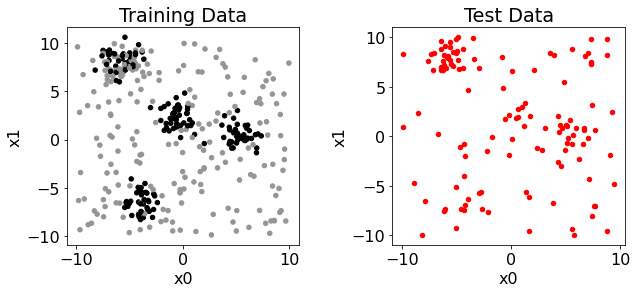

In [63]:
plt.rcParams["font.size"] = 16
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
train.plot.scatter(x="x0", y="x1", c=train["y"], vmin=-1, ax=ax[0])
test.plot.scatter(x="x0", y="x1", c="red", ax=ax[1])
ax[0].set_title("Training Data")
ax[1].set_title("Test Data")
plt.subplots_adjust(wspace=0.4)

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ("km", KMeans(4)),
    ("std", StandardScaler()),
    ("lr", LogisticRegression())
])

model.fit(train[["x0", "x1"]], train["y"])
model.score(test[["x0", "x1"]], test["y"])

0.648

# StandardScaler with KMeans

<AxesSubplot:xlabel='0', ylabel='1'>

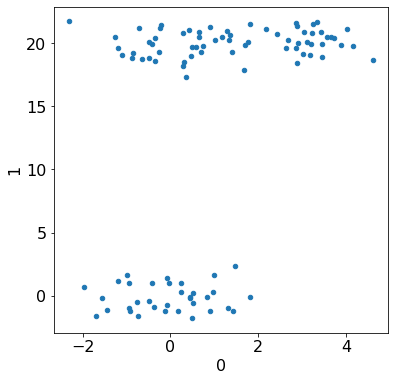

In [81]:
x = datasets.make_blobs(centers=np.array([(0,0), (0,20), (3,20)]))[0]
df = pd.DataFrame(x)
df.plot.scatter(x=0, y=1, figsize=(6,6))

In [88]:
df = pd.DataFrame(df.values * [[1000,1]])
df

,0,1
0,3336.115963,21.724558
1,3888.114430,19.852820
2,444.820774,-0.181016
3,-77.231267,1.374988
4,278.079337,20.806342
...,...,...
95,3195.202828,19.984244
96,-1557.100505,-0.185684
97,4027.223031,21.165058
98,424.529381,21.064312


In [89]:
km = KMeans(2)
km.fit_predict(df)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int32)

<AxesSubplot:xlabel='0', ylabel='1'>

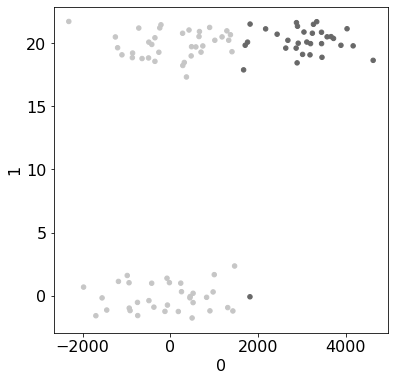

In [90]:
df.plot.scatter(x=0, y=1, figsize=(6,6), c=km.fit_predict(df), vmin=-1, vmax=2)

<AxesSubplot:xlabel='0', ylabel='1'>

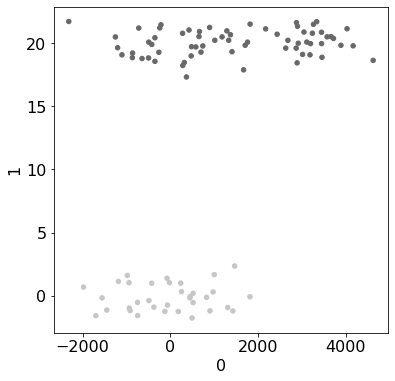

In [92]:
km_std = Pipeline([
    ("std", StandardScaler()),
    ("km", KMeans(2)),
])
df.plot.scatter(x=0, y=1, figsize=(6,6), c=km_std.fit_predict(df), vmin=-1, vmax=2)